In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df_test.head(5)

,free_text,label_id
0,Đừng cố biện minh =)))) choi lon,0
1,Haizz. Nthe này thì dân khổ quá,1
2,the nay ma chi phat gay roi trat tu cong cong ...,0
3,Mua cho em hộp bcs mĩ sài cho oai :)),0
4,coin card :3,1


In [5]:
df_train = df_train.dropna()
df_train.isna().sum()

free_text    0
label_id     0
dtype: int64

In [6]:
df_test = df_test.dropna()
df_test.isna().sum()

free_text    0
label_id     0
dtype: int64

In [35]:
# Giả sử cột nhãn là 'label_id'
df_train["label_id"] = df_train["label_id"].replace(2, 1)
df_test["label_id"] = df_test["label_id"].replace(2, 1)  # nếu test cũng có nhãn 2


# Hàm làm sạch văn bản

In [56]:
import re
def clean_text(sentence):
    sentence = re.sub(r'[^a-zA-Z0-9À-Ỵà-ỹ\s]', '', sentence)
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence


df_train["free_text"].apply(clean_text)
df_test["free_text"].apply(clean_text)


0                              Đừng cố biện minh choi lon
1                          Haizz Nthe này thì dân khổ quá
2       the nay ma chi phat gay roi trat tu cong cong ...
3                       Mua cho em hộp bcs mĩ sài cho oai
4                                             coin card 3
                              ...                        
6675                   Nghe cũng được Nhưng vẫn cày views
6676    Pha team up căng cực đến từ vị trí ông chủ đầm...
6677    Thanh Nhường sao m đọc đc cmt của t thế tiên sư m
6678    Đúng rồi nhìn có ria mép với mặt giống đàn ông...
6679    Chưa chắc Mỹ bị nhiễm virus corona Vũ hán của ...
Name: free_text, Length: 6680, dtype: object

# Convert word

## Binary

In [37]:
from sklearn.feature_extraction.text import CountVectorizer


binary_vectorizer =  CountVectorizer(binary=True)
X_train_bi = binary_vectorizer.fit_transform(df_train["free_text"])
y_train_bi = df_train["label_id"]
X_test_bi = binary_vectorizer.transform(df_test["free_text"])
y_test_bi = df_test["label_id"]

# TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()


X_train_idf = tfidf_vectorizer.fit_transform(df_train["free_text"])
X_test_idf  = tfidf_vectorizer.transform(df_test["free_text"])

y_train_idf = df_train["label_id"]
y_test_idf  = df_test["label_id"]


# Word embedding

# Models

In [45]:
# Các model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Kernel SVM (RBF)": SVC(kernel="rbf"),
    "SGD Classifier": SGDClassifier(max_iter=1000, tol=1e-3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

## Binary word

In [46]:
accurr_binary = []
for name, model in models.items():
    model.fit(X_train_bi, y_train_bi)
    y_pred_bi = model.predict(X_test_bi)
    acc = round(accuracy_score(y_test_bi, y_pred_bi),2)
    accurr_binary.append(acc)
    print(f"{name}: {acc:.4f}")

# for name, model in models.items():
#     print("="*60)
#     print(f"Model: {name}")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(classification_report(y_test, y_pred))

Logistic Regression: 0.8900
Naive Bayes (Multinomial): 0.8800
Linear SVM: 0.8800
Kernel SVM (RBF): 0.8700
SGD Classifier: 0.8900
Decision Tree: 0.8600
Random Forest: 0.8800
Gradient Boosting: 0.8700


In [47]:
models_name = [name for name,_ in models.items()]
print(models_name)
print(accurr_binary)

['Logistic Regression', 'Naive Bayes (Multinomial)', 'Linear SVM', 'Kernel SVM (RBF)', 'SGD Classifier', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
[0.89, 0.88, 0.88, 0.87, 0.89, 0.86, 0.88, 0.87]


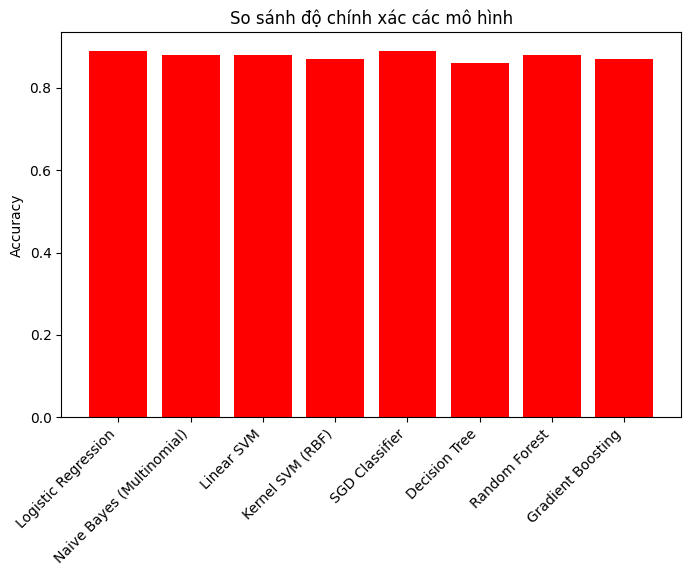

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(models_name, accurr_binary, color="red")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác các mô hình")
plt.show()

In [50]:
test_sentences = [
    "Tao ghét mày #$%^^^",
    "Mày thật ngu %%%#^@^^",
    "Chúc bạn một ngày vui vẻ",
    "Cố gắng học tập chăm chỉ nhé",
    "Đừng có làm phiền tao nữa",
    "Mong bạn luôn hạnh phúc",
    "Sao mày ngu thế hả?",
    "Học giỏi thì tương lai sáng lạn",
    "m là thằng đĩ chó"
    "T đụ con mẹ m như cái bồn chứa tinh"
]

X_new = [clean_text(sentence) for sentence in test_sentences]
X_new = binary_vectorizer.transform(test_sentences)

print("Predictions on new sentences:")
for name, model in models.items():
    y_pred = model.predict(X_new)
    print(f"\n{name}:")
    for sentence, pred in zip(test_sentences, y_pred):
        print(f"sentence: {sentence},label: {pred}")



Predictions on new sentences:

Logistic Regression:
sentence: Tao ghét mày #$%^^^,label: 0
sentence: Mày thật ngu %%%#^@^^,label: 1
sentence: Chúc bạn một ngày vui vẻ,label: 0
sentence: Cố gắng học tập chăm chỉ nhé,label: 0
sentence: Đừng có làm phiền tao nữa,label: 0
sentence: Mong bạn luôn hạnh phúc,label: 0
sentence: Sao mày ngu thế hả?,label: 1
sentence: Học giỏi thì tương lai sáng lạn,label: 0
sentence: m là thằng đĩ chóT đụ con mẹ m như cái bồn chứa tinh,label: 1

Naive Bayes (Multinomial):
sentence: Tao ghét mày #$%^^^,label: 1
sentence: Mày thật ngu %%%#^@^^,label: 1
sentence: Chúc bạn một ngày vui vẻ,label: 0
sentence: Cố gắng học tập chăm chỉ nhé,label: 0
sentence: Đừng có làm phiền tao nữa,label: 0
sentence: Mong bạn luôn hạnh phúc,label: 0
sentence: Sao mày ngu thế hả?,label: 1
sentence: Học giỏi thì tương lai sáng lạn,label: 0
sentence: m là thằng đĩ chóT đụ con mẹ m như cái bồn chứa tinh,label: 1

Linear SVM:
sentence: Tao ghét mày #$%^^^,label: 0
sentence: Mày thật ngu %

## TFIDF

Logistic Regression: 0.8800
Naive Bayes (Multinomial): 0.8500
Linear SVM: 0.8900
Kernel SVM (RBF): 0.8900
SGD Classifier: 0.8800
Decision Tree: 0.8500
Random Forest: 0.8800
Gradient Boosting: 0.8700
['Logistic Regression', 'Naive Bayes (Multinomial)', 'Linear SVM', 'Kernel SVM (RBF)', 'SGD Classifier', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
[0.88, 0.85, 0.89, 0.89, 0.88, 0.85, 0.88, 0.87]


Text(0.5, 1.0, 'So sánh độ chính xác các mô hình')

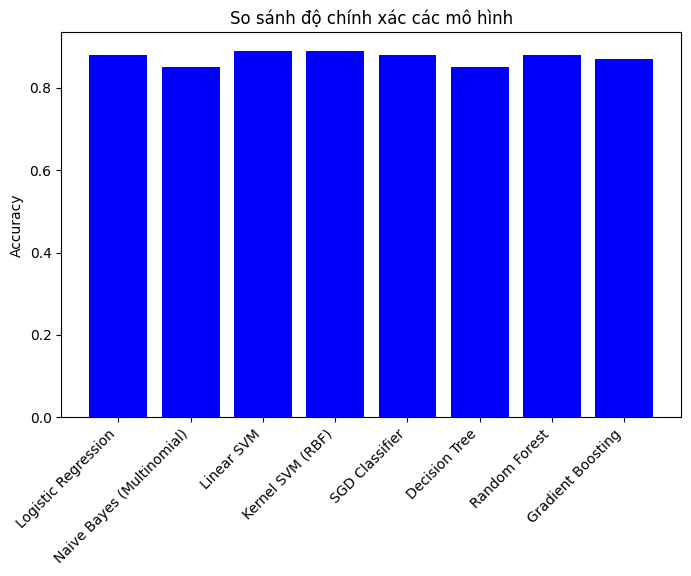

In [55]:
accurr_tfidf = []
for name, model in models.items():
    model.fit(X_train_idf, y_train_idf)
    y_pred_idf = model.predict(X_test_idf)
    acc = round(accuracy_score(y_test_idf, y_pred_idf),2)
    accurr_tfidf.append(acc)
    print(f"{name}: {acc:.4f}")

# for name, model in models.items():
#     print("="*60)
#     print(f"Model: {name}")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(classification_report(y_test, y_pred))

models_name = [name for name,_ in models.items()]
print(models_name)
print(accurr_tfidf)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(models_name, accurr_tfidf, color="blue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác các mô hình")

In [54]:
test_sentences = [
    "Tao ghét mày #$%^^^",
    "Mày thật ngu %%%#^@^^",
    "Chúc bạn một ngày vui vẻ",
    "Cố gắng học tập chăm chỉ nhé",
    "Đừng có làm phiền tao nữa",
    "Mong bạn luôn hạnh phúc",
    "Sao mày ngu thế hả?",
    "Học giỏi thì tương lai sáng lạn",
    "m là thằng đĩ chó",
    "cái bồn chứa tinh"
]

X_new = [clean_text(sentence) for sentence in test_sentences]
X_new = tfidf_vectorizer.transform(test_sentences)

print("Predictions on new sentences:")
for name, model in models.items():
    y_pred = model.predict(X_new)
    print(f"\n{name}:")
    for sentence, pred in zip(test_sentences, y_pred):
        print(f"sentence: {sentence},label: {pred}")

Predictions on new sentences:

Logistic Regression:
sentence: Tao ghét mày #$%^^^,label: 0
sentence: Mày thật ngu %%%#^@^^,label: 1
sentence: Chúc bạn một ngày vui vẻ,label: 0
sentence: Cố gắng học tập chăm chỉ nhé,label: 0
sentence: Đừng có làm phiền tao nữa,label: 0
sentence: Mong bạn luôn hạnh phúc,label: 0
sentence: Sao mày ngu thế hả?,label: 1
sentence: Học giỏi thì tương lai sáng lạn,label: 0
sentence: m là thằng đĩ chó,label: 1
sentence: cái bồn chứa tinh,label: 0

Naive Bayes (Multinomial):
sentence: Tao ghét mày #$%^^^,label: 0
sentence: Mày thật ngu %%%#^@^^,label: 1
sentence: Chúc bạn một ngày vui vẻ,label: 0
sentence: Cố gắng học tập chăm chỉ nhé,label: 0
sentence: Đừng có làm phiền tao nữa,label: 0
sentence: Mong bạn luôn hạnh phúc,label: 0
sentence: Sao mày ngu thế hả?,label: 0
sentence: Học giỏi thì tương lai sáng lạn,label: 0
sentence: m là thằng đĩ chó,label: 1
sentence: cái bồn chứa tinh,label: 1

Linear SVM:
sentence: Tao ghét mày #$%^^^,label: 0
sentence: Mày thật n

# Các từ toxic

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd


df_train["free_text"].head(10)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train["free_text"])
y_train = df_train["label_id"]


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]  

coef_df = pd.DataFrame({"word": feature_names, "coef": coefs})


coef_df = coef_df.sort_values(by="coef", ascending=False)
top_toxic_words = coef_df.head(500)  


top_toxic_words.to_csv("top_1000_toxic_words.csv", index=False)
print("Đã xuất top 1000 từ toxic ra file top_1000_toxic_words.csv")
df_toxic = pd.read_csv("top_1000_toxic_words.csv")
top_toxic_words = df_toxic["word"].tolist()


top_toxic_words[:10]

Đã xuất top 1000 từ toxic ra file top_1000_toxic_words.csv


['cc', 'clm', 'cl', 'dm', 'lồn', 'cặc', 'lol', 'lòn', 'sủa', 'khùng']

# Thay các từ toxic thành *** khỏi câu

In [ ]:
def censor_toxic(text, toxic_words):
    words = text.split()
    censored_words = [
        "***" if w.lower() in toxic_words else w
        for w in words
    ]
    return " ".join(censored_words)

while True:
    inp = input("Nhập câu: ")
    if inp.lower() in ["exit", "quit"]:
        break
    print(censor_toxic(inp, top_toxic_words))
